In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
dataset=pd.read_csv('Algerian_forest_fires_dataset.csv')
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [122]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [123]:
# data cleaning

dataset.isnull().sum()

,0
day,1
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [124]:
dataset.shape

(246, 14)

In [125]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,245,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,32,5,2,20,63,19,40,174,167,199,107,175,127,9
top,1,7,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [126]:
dataset.loc[:122,'Region']=0
dataset.loc[124:,'Region']=1

In [127]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [128]:
dataset.shape

(246, 15)

In [129]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       245 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [130]:
dataset.isnull().sum()

,0
day,1
month,1
year,1
Temperature,1
RH,1
Ws,1
Rain,1
FFMC,1
DMC,1
DC,1


In [131]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [132]:
#remove null

dataset=dataset.dropna().reset_index(drop=True)

In [133]:
dataset.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [134]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [135]:
dataset.columns = dataset.columns.str.strip()

In [136]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [139]:
dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']]=dataset[['day', 'month', 'year', 'Temperature', 'RH', 'Ws','Region']].astype(int)

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [141]:
dataset[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']]=dataset[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [143]:
# output class to numerical classes 0 -> no fire, 1->fire

dataset['Classes']=np.where(dataset['Classes'].str.contains("not fire"),0,1)

In [145]:
dataset.head( 10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [146]:
# Save the new dataset

dataset.to_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [147]:
dataset=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
dataset.head(10)

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [150]:
# independent n dependent col

dataset.drop(['Unnamed: 0','day','month','year'],axis=1,inplace=True)

In [151]:
dataset.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>],
       [<Axes: title={'center': 'DC'}>, <Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>]], dtype=object)

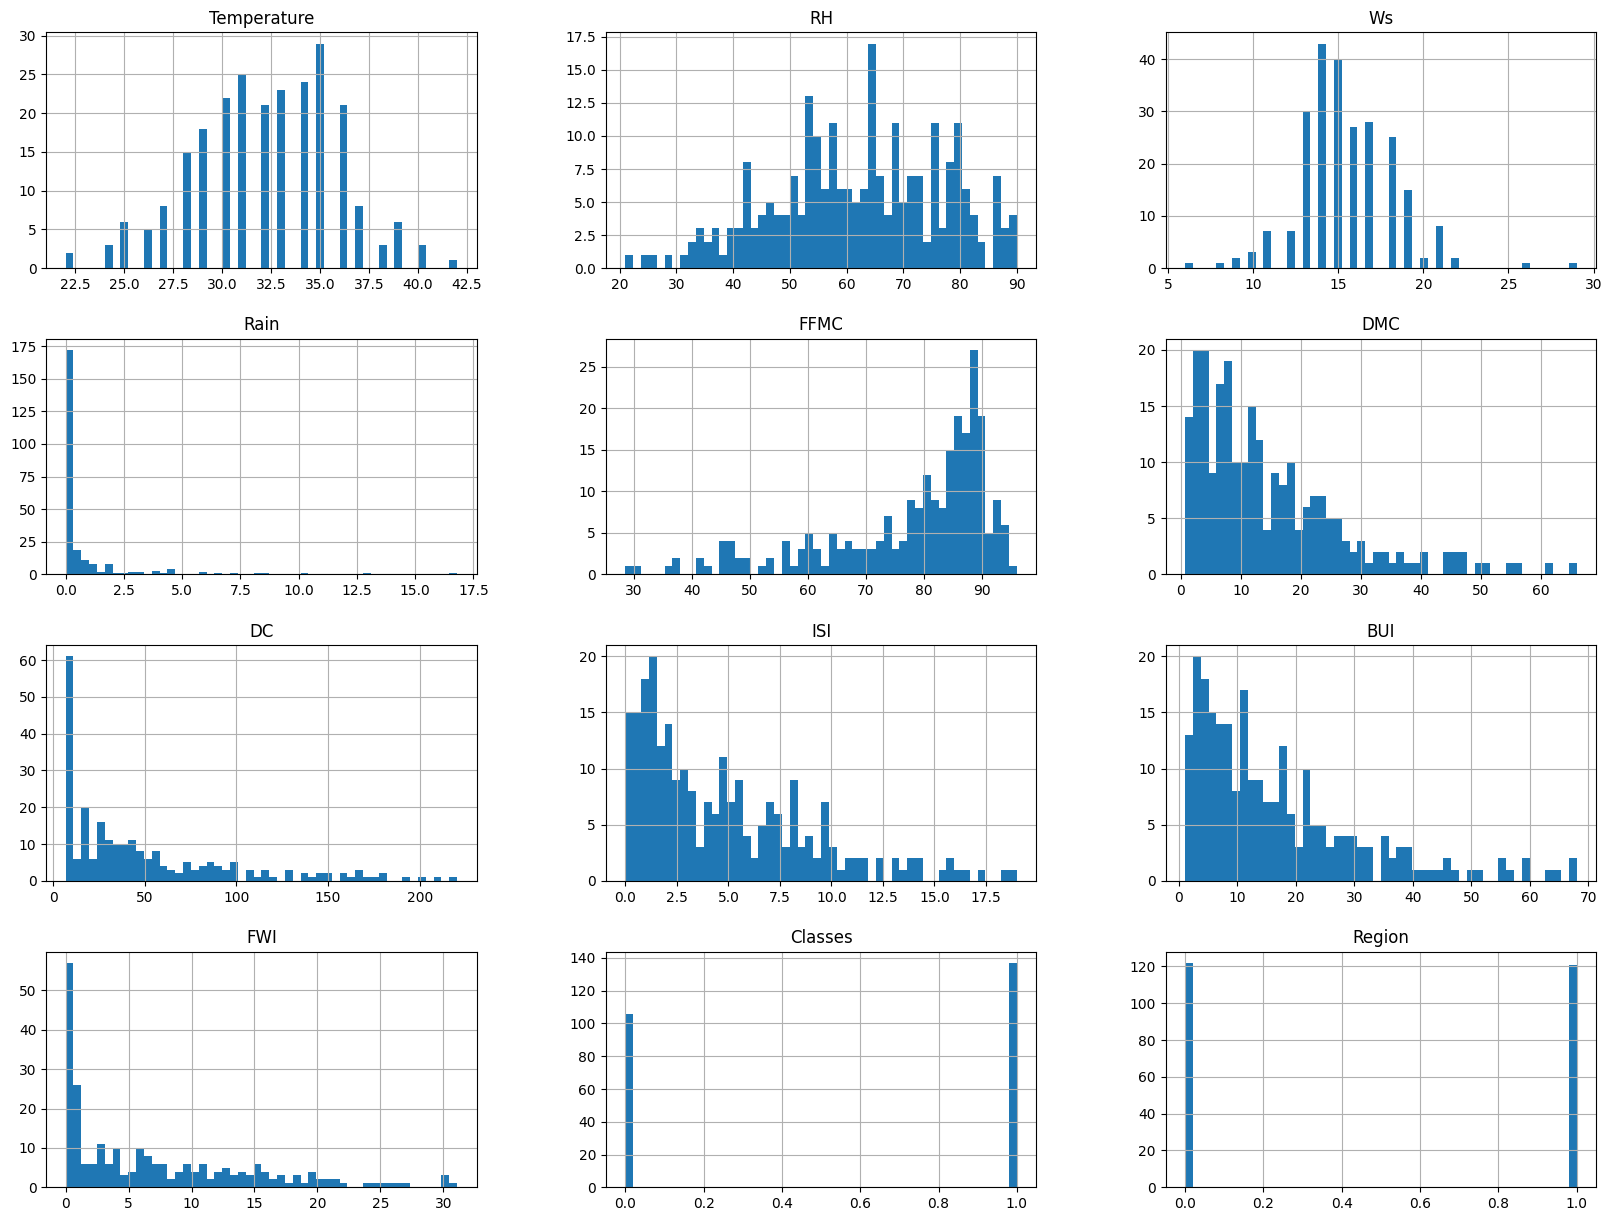

In [153]:
dataset.hist(bins=50,figsize=(20,15))

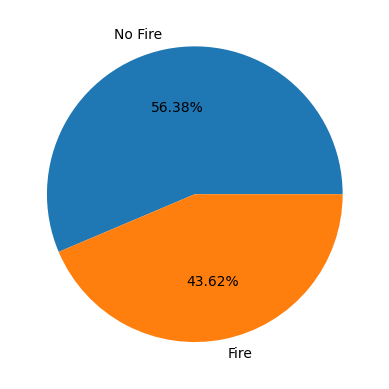

In [155]:

plt.pie(dataset['Classes'].value_counts(),labels=['No Fire','Fire'],autopct='%1.2f%%')
plt.show()

In [157]:
#correaltion

dataset.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

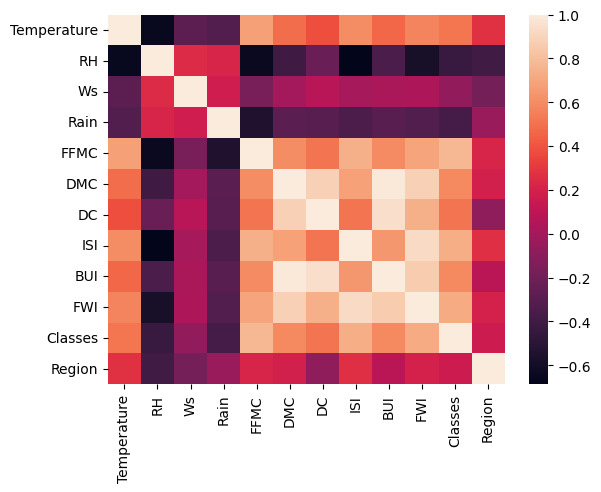

In [159]:
sns.heatmap(dataset.corr())

<Axes: ylabel='Temperature'>

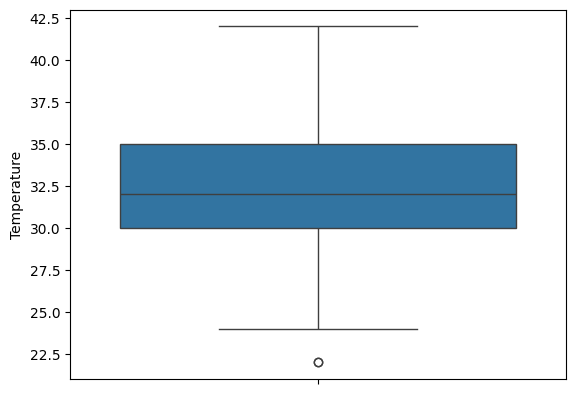

In [162]:
# box plot
sns.boxplot(dataset['Temperature'])

In [165]:
# Independent n Dependent feature
X=dataset.drop('FWI',axis=1)
Y=dataset["FWI"]


In [166]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [167]:
Y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [188]:
# train n split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)


<Axes: >

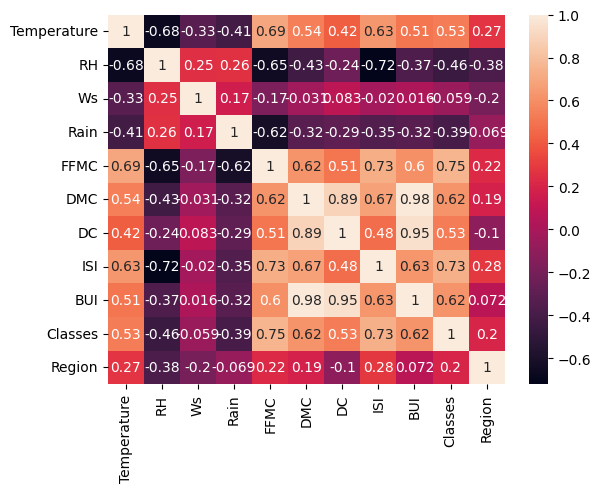

In [189]:
# feature selction basis on corr
# check for multi-collinearity
corr_matrix=X_train.corr()
sns.heatmap(corr_matrix,annot=True)

In [190]:
# funct remove that func , basis threshold

def get_corr(data,threshold):
    corr_col=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col

corr_arr=get_corr(X_train,0.77) # set by domain expert

In [191]:
X_train.drop(corr_arr,axis=1,inplace=True)
X_test.drop(corr_arr,axis=1,inplace=True)


In [192]:
print(X_train.shape)
print(X_test.shape)


(170, 9)
(73, 9)


In [193]:
# standarisattion

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

<Axes: >

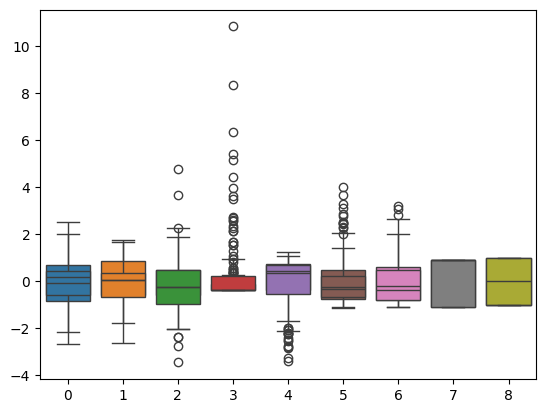

In [194]:
# outliers

sns.boxplot(X_train)
sns.boxplot(X_test)

In [196]:
# linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
r2=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
print("r2 ",r2)
print("mse ",mse)
print("mae ",mae)

r2  0.9791373929903439
mse  0.9326902312298839
mae  0.6874065018134737


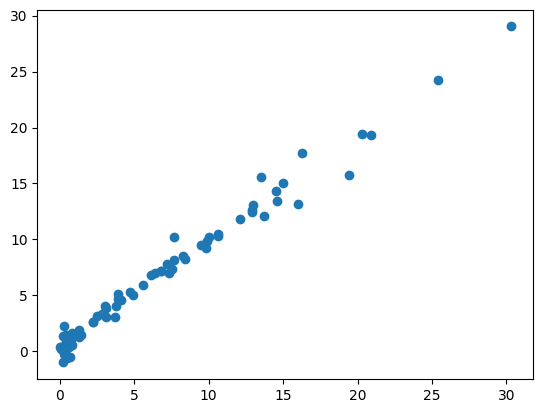

In [197]:
plt.scatter(Y_test,Y_pred)


In [199]:
# L1  Lasso

from sklearn.linear_model import Lasso

la=Lasso()
la.fit(X_train,Y_train)
Y_pred=la.predict(X_test)
r2=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
print("r2 ",r2)
print("mse ",mse)
print("mae ",mae)

r2  0.9472395184862836
mse  2.358726581009366
mae  1.1503982406756685


In [200]:
# L2

from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(X_train,Y_train)
Y_pred=rd.predict(X_test)
r2=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
print("r2 ",r2)
print("mse ",mse)
print("mae ",mae)

r2  0.9783513089894386
mse  0.967833148327019
mae  0.7035548539407871


In [201]:
# Elastic

from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(X_train,Y_train)
Y_pred=en.predict(X_test)
r2=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
print("r2 ",r2)
print("mse ",mse)
print("mae ",mae)

r2  0.868030489960687
mse  5.8998701733149455
mae  1.8607608828475837


In [202]:
# Lasso CV

from sklearn.linear_model import LassoCV
la=LassoCV()
la.fit(X_train,Y_train)
Y_pred=la.predict(X_test)
r2=r2_score(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)

print("r2 ",r2)
print("mse ",mse)
print("mae ",mae)

r2  0.9794385890800831
mse  0.9192248646793675
mae  0.6806654123714686


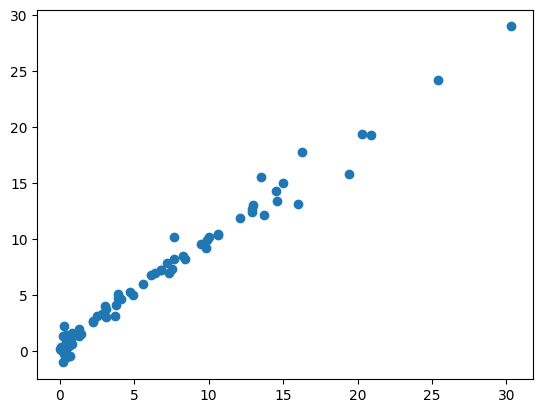

In [203]:
plt.scatter(Y_test,Y_pred)